<a href="https://colab.research.google.com/github/ivan0054/TP-Final-Pavon/blob/Juani/TP_FINAL_Pav%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data_TF.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,NaN,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,NaN,1.0,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0.0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0.0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0.0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Box plot: Age (Edad) vs Stroke (Ataque)')
plt.show()

In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                4957 non-null   float64
 3   hypertension       4855 non-null   float64
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4398 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 479.2+ KB


(None,
                  id          age  hypertension  heart_disease  \
 count   5110.000000  4957.000000   4855.000000    5110.000000   
 mean   36517.829354    43.198305      0.100309       0.054012   
 std    21161.721625    22.607355      0.300442       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.000000  4398.000000  5110.000000  
 mean          106.147677    28.904388     0.048728  
 std            45.283560     7.858096     0.215320  
 min            55.120000    10.300000     0.000000  
 25%            77.245000    23.600000     0.000000  
 50%            91.885000    28.050000     0.000000  
 75%           114.

In [ ]:
df.drop(columns=['', '', ''], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
gender,0
age,153
hypertension,255
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,712
smoking_status,0


In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0], inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
print("\nValores nulos después de la verificación:")
print(df.isnull().sum())

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


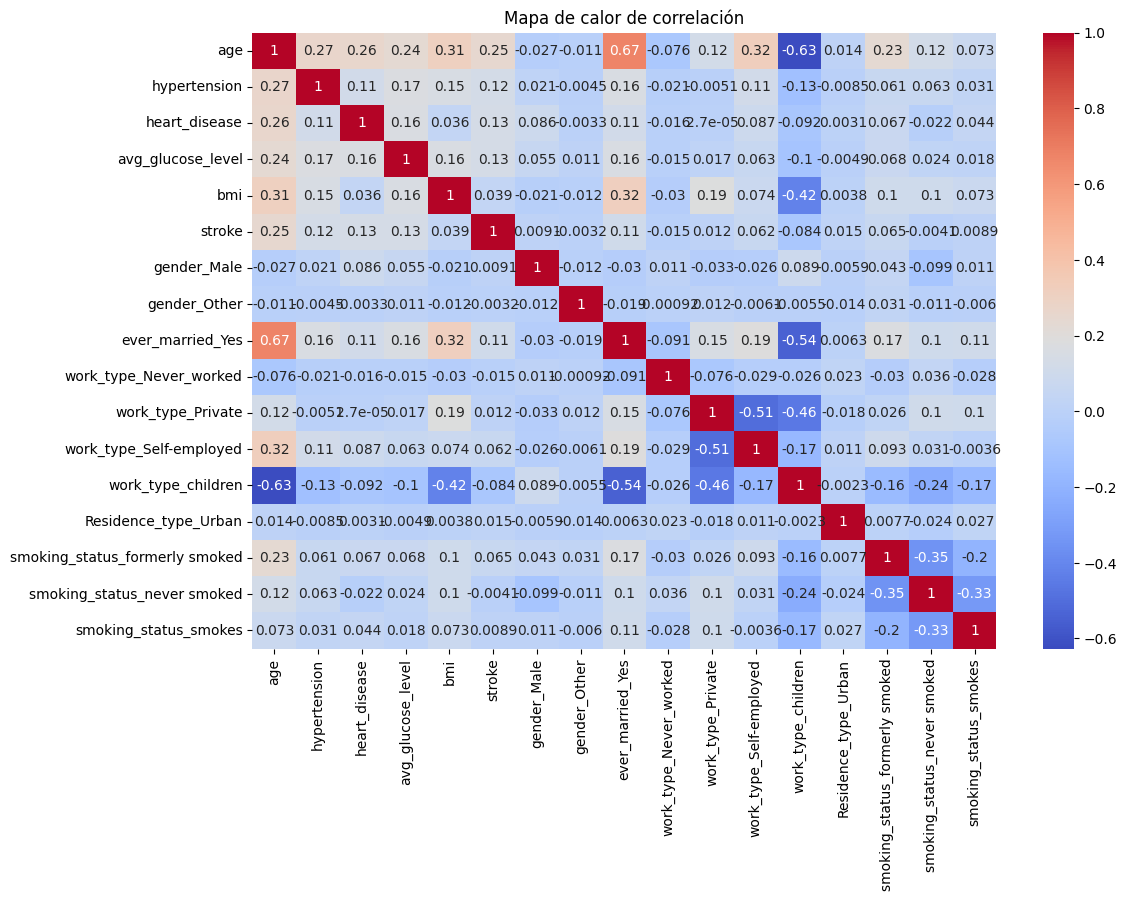

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlación')
plt.show()


In [ ]:
X = df_encoded.drop("stroke", axis=1)
y = df_encoded["stroke"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Exactitud:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.33      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533

Exactitud: 0.9504240052185258


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()